In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\raymo\\Downloads\\Lego\\lego_sets_and_themes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21503 entries, 0 to 21502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   set_number       21496 non-null  object 
 1   set_name         21496 non-null  object 
 2   year_released    21496 non-null  float64
 3   number_of_parts  21496 non-null  float64
 4   image_url        21496 non-null  object 
 5   theme_name       21503 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1008.1+ KB


In [91]:
df.head(2)

,set_number,set_name,year_released,number_of_parts,theme_name
0,001-1,Gears,1965,43.0,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,3.0,Technic


In [4]:
#clean dataset
df.drop('image_url',axis=1,inplace=True)
df.dropna(subset=['set_number', 'set_name', 'year_released', 'number_of_parts'], inplace=True)

In [5]:
#convert year to data type int
df['year_released'] = df['year_released'].astype(int)
df['number_of_parts']=df['number_of_parts'].astype(int)

In [6]:
#remove duplicates
df_no_duplicates=df.drop_duplicates

In [111]:
df.head(2)

,set_number,set_name,year_released,number_of_parts,theme_name
0,001-1,Gears,1965,43,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,3,Technic


In [33]:
#let's explore the themes wholesomely
df['theme_name'].unique()

array(['Technic', 'Competition', 'Expert Builder', 'RoboRiders',
       'Speed Slammers', 'Star Wars', 'Supplemental', 'Throwbot Slizer',
       'Universal Building Set', 'Creator', 'Make & Create',
       'Bricks & More', 'Town', 'Arctic', 'City', 'Airport', 'Cargo',
       'Coast Guard', 'Construction', 'Farm', 'Fire', 'Harbor',
       'Hospital', 'Police', 'Traffic', 'Off-Road', 'Trains',
       'Classic Town', 'Divers', 'Extreme Team', 'Launch Command',
       'Outback', 'Paradisa', 'Race', 'Res-Q', 'Space Port', 'Town Jr.',
       'Town Plan', 'World City', 'City Center', 'Racers', 'Ferrari',
       'Williams F1', 'World Racers', 'Space', 'Alien Conquest',
       'Blacktron I', 'Blacktron II', 'Classic Space', 'Exploriens',
       'Futuron', 'Ice Planet 2002', 'Insectoids', 'Life On Mars',
       'M:Tron', 'Mars Mission', 'RoboForce', 'Space Police I',
       'Space Police II', 'Space Police III', 'Spyrius', 'UFO', 'Unitron',
       'Galaxy Squad', 'Pirates I', 'Pirates II', 'Pira

In [7]:
#let's define themes by number of parts released per year
theme_part_counts=df.groupby('theme_name')['number_of_parts'].sum().sort_values(ascending=False)
theme_part_counts.head(30)#let's view the top 30

theme_name
Technic                       251999
Star Wars                     240206
Friends                       120771
Ninjago                       118375
Ultimate Collector Series     100576
Icons                          99808
Creator Expert                 79954
Harry Potter                   74905
Creator 3-in-1                 74237
LEGO Ideas and CUUSOO          68500
LEGO Art                       52781
Classic Town                   51147
City                           48353
Creator                        47694
Educational and Dacta          47230
BrickLink Designer Program     46888
FIRST LEGO League              46253
Modular Buildings              44652
Basic Set                      41552
Minecraft                      41361
Monkie Kid                     40014
Basic                          38977
Classic                        34795
Super Heroes Marvel            33140
Police                         32759
Architecture                   32056
Super Mario                

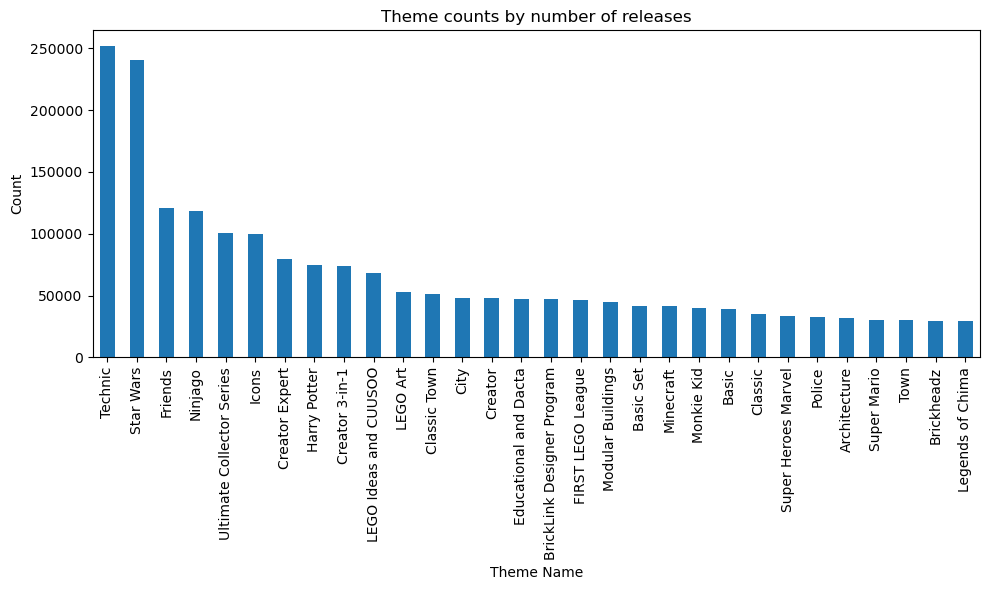

In [8]:
plt.figure(figsize=(10, 6))
theme_part_counts.head(30).plot(kind='bar')
plt.title('Theme counts by number of releases')
plt.xlabel('Theme Name')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The plot above shows theme dominance by number of parts released respectively over the years since inception.

In [8]:
#let's deduct themes by demand for the last 10 years
last_10_years=df[(df['year_released']>=2014)]
last_10_years=last_10_years.groupby('theme_name')['number_of_parts'].sum().sort_values(ascending=False)
last_10_years.head(10)

theme_name
Star Wars                    147267
Technic                      140385
Friends                      111089
Ninjago                      103778
Icons                         99808
LEGO Ideas and CUUSOO         66838
Harry Potter                  57014
LEGO Art                      52781
Ultimate Collector Series     50922
Creator 3-in-1                47256
Name: number_of_parts, dtype: int32

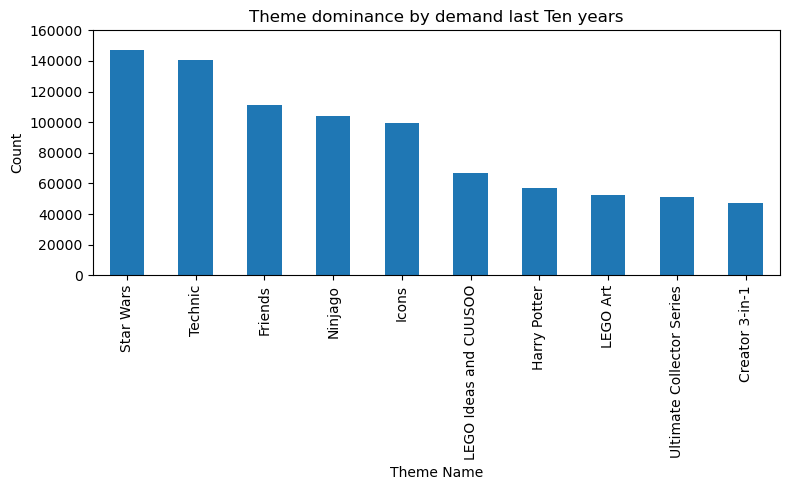

In [10]:
plt.figure(figsize=(8, 5))
last_10_years.head(10).plot(kind='bar')
plt.title('Theme dominance by demand last Ten years')
plt.xlabel('Theme Name')
plt.ylabel('Count')
plt.ylim(0, 160000)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Plot above shows ten most dominant themes by demand last ten years

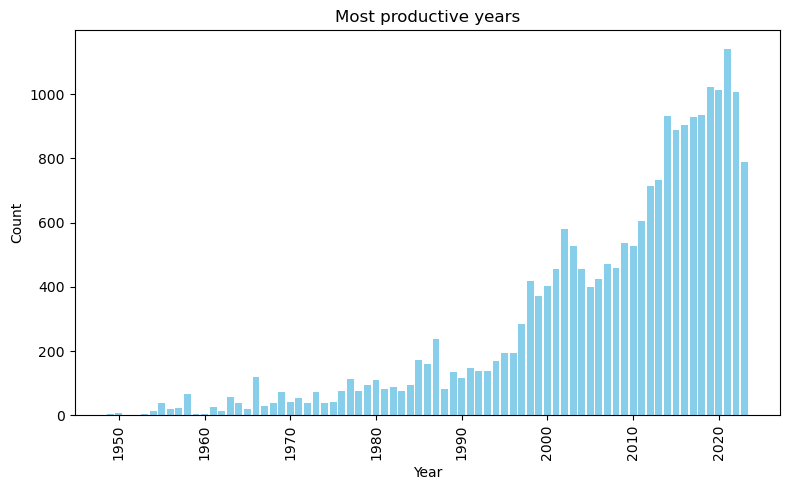

In [11]:
#deduct years with most releases
yearly_releases=df['year_released'].value_counts().reset_index()
yearly_releases.columns=['Year','number_of_parts']
most_productive_years=yearly_releases.sort_values(by='number_of_parts',ascending=False)

#plot results
plt.figure(figsize=(8, 5))
plt.bar(most_productive_years['Year'], most_productive_years['number_of_parts'], color='skyblue')
plt.title('Most productive years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [105]:
most_productive_years.head()

,Year,number_of_parts
0,2021,1142
1,2019,1023
2,2020,1014
3,2022,1008
4,2018,934


Year after COVID (2021) was most productive year for Lego

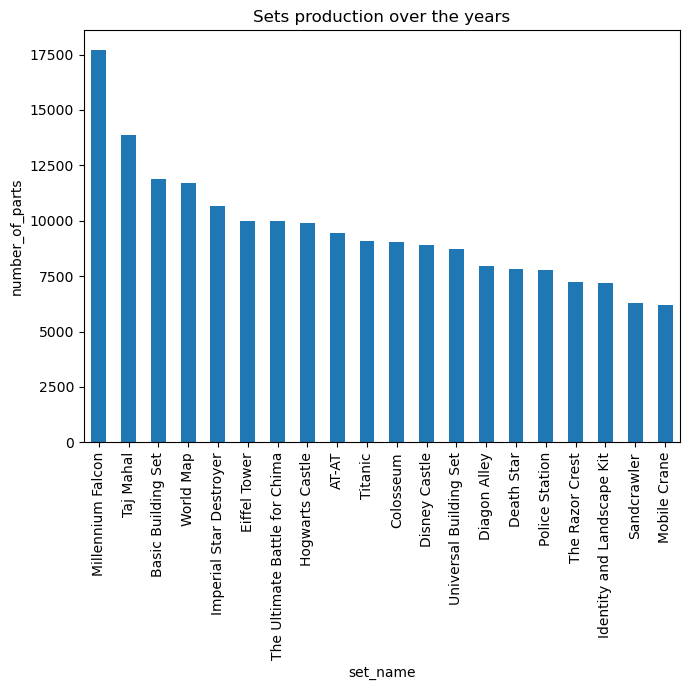

In [16]:
#deduct set name with most releases
set_by_demand=df.groupby('set_name')['number_of_parts'].sum().sort_values(ascending=False)
set_by_demand.head()

#plot results
plt.figure(figsize=(9, 7))
set_by_demand.head(20).plot(kind='bar')
plt.title('Sets production over the years')
plt.xlabel('set_name')
plt.ylabel('number_of_parts')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [120]:
set_by_demand.head(10)

set_name
Millennium Falcon                17709
Taj Mahal                        13869
Basic Building Set               11876
World Map                        11695
Imperial Star Destroyer          10648
Eiffel Tower                     10001
The Ultimate Battle for Chima     9987
Hogwarts Castle                   9891
AT-AT                             9429
Titanic                           9092
Name: number_of_parts, dtype: int32

Millennium Falcon is the most produced set over the years

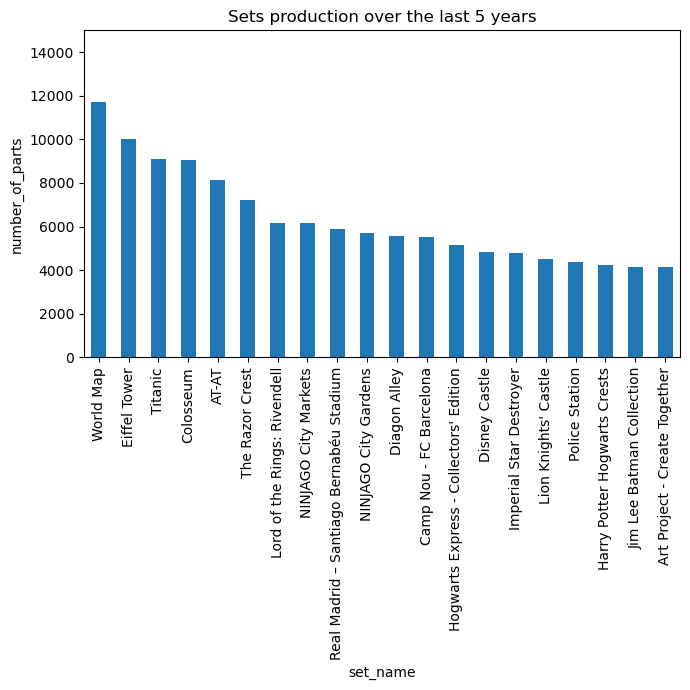

In [17]:
#extrapolate for last 5 years
set_by_demand_last_5_years=df[(df['year_released']>=2019)]
set_by_demand_last_5_years=set_by_demand_last_5_years.groupby('set_name')['number_of_parts'].sum().sort_values(ascending=False)
#plot results
plt.figure(figsize=(7, 7))
set_by_demand_last_5_years.head(20).plot(kind='bar')
plt.title('Sets production over the last 5 years')
plt.ylim(0, 15000)
plt.xlabel('set_name')
plt.ylabel('number_of_parts')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

When you investigate for the last 5 years you get different results, only World Map and Eiffel Tower have remained relevant.

Other new sets have crept and dominated

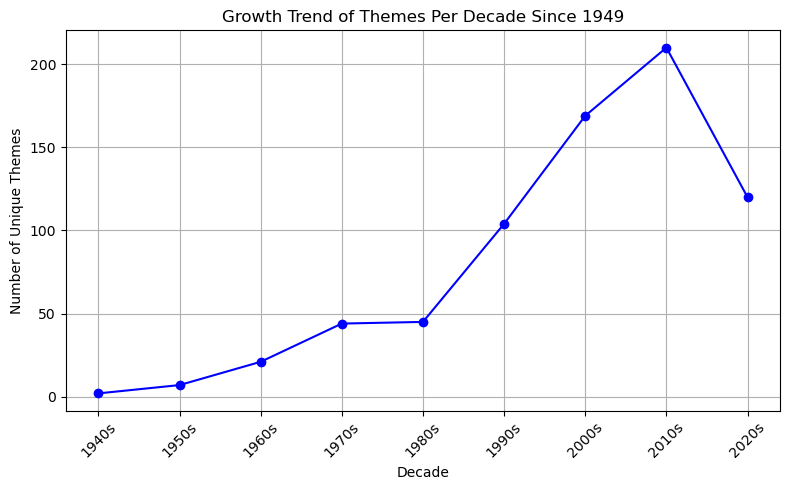

In [26]:
#let's deduct growth rate of themes by the decades 
#this will show difference in number of themes per decade
def extract_decade(year):
    return str(year.year // 10 * 10) + "s"

# Create a new 'decade' column
df['year_released'] = pd.to_datetime(df['year_released'], format='%Y')# convert date to string
df['decade'] = df['year_released'].apply(extract_decade)#apply fu

# Count themes per decade
themes_per_decade = df.groupby('decade')['theme_name'].nunique()

# Create a line plot to visualize the growth trend
themes_per_decade.head(20).plot(kind='line', marker='o', linestyle='-', color='b', figsize=(8, 5))
plt.title('Growth Trend of Themes Per Decade Since 1949')
plt.xlabel('Decade')
plt.ylabel('Number of Unique Themes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()

The number of themes released per decade has been gradually growing until beginning of 2010s.
Since then the number of themes have sharply declined.

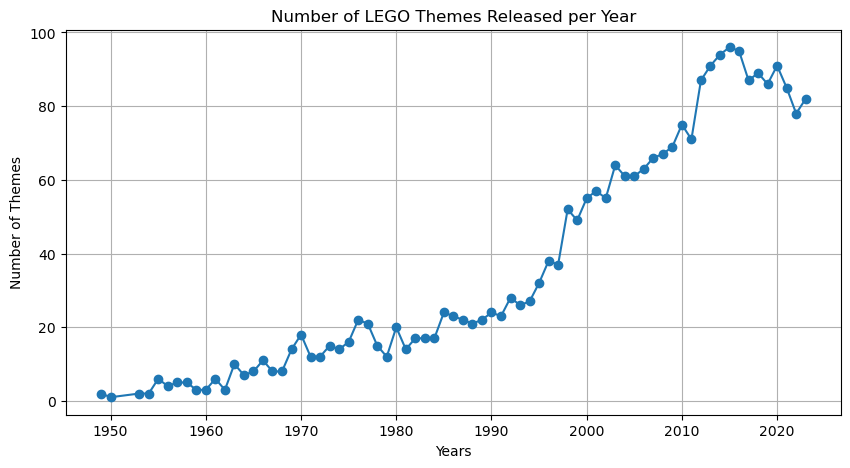

In [32]:
#group themes released per year
themes_per_year=df.groupby('year_released')['theme_name'].nunique().reset_index()
themes_per_year.columns=['Years','Number of themes']

#let's deduct growth pattern of themes used per year 
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(themes_per_year['Years'], themes_per_year['Number of themes'], marker='o', linestyle='-')
# Add labels and title
plt.xlabel('Years')
plt.ylabel('Number of Themes')
plt.title('Number of LEGO Themes Released per Year')
# Show grid lines
plt.grid(True)
plt.show()

Number of themes released per year have been increasing per year but with a decrease in 2020-22